In [1]:
import os
os.chdir("..")


In [4]:
import torch
from epilearn.models.Temporal import DlinearModel
from epilearn.data import UniversalDataset
from epilearn.tasks.forecast import Forecast
from epilearn.utils import transforms

lookback = 16 # inputs size
horizon = 1 # predicts size

dataset = UniversalDataset(name='JHU_covid', root='./tmp/')
inputs = dataset.x[0,:].unsqueeze(1)

dataset = UniversalDataset(x=inputs, y=inputs)

transformation = transforms.Compose({
                "features": [transforms.normalize_feat()],
                "target": [transforms.normalize_feat()]
                })
dataset.transforms = transformation

task = Forecast(prototype=DlinearModel,
                    dataset=None,
                    lookback=lookback,
                    horizon=horizon,
                    device='cpu')

result = task.train_model(dataset=dataset,
                        loss='mse',
                        epochs=50,
                        batch_size=16,
                        train_rate=0.6,
                        val_rate=0.1,
                        permute_dataset=False,
                        )

eval_result = task.evaluate_model(model=task.model,
                                 features=task.train_split['features'],
                                 targets=task.train_split['targets'])


temporal model loaded!


100%|██████████| 50/50 [00:00<00:00, 70.83it/s]



Final Training loss: 0.00012797364165418825
Final Validation loss: 0.002182203345000744
Test MSE: 0.00027254471206106246
Test MAE: 0.014901455491781235
Test RMSE: 0.016508927568793297
Test MSE: 0.000126868617371656
Test MAE: 0.00831321720033884
Test RMSE: 0.011263596825301647


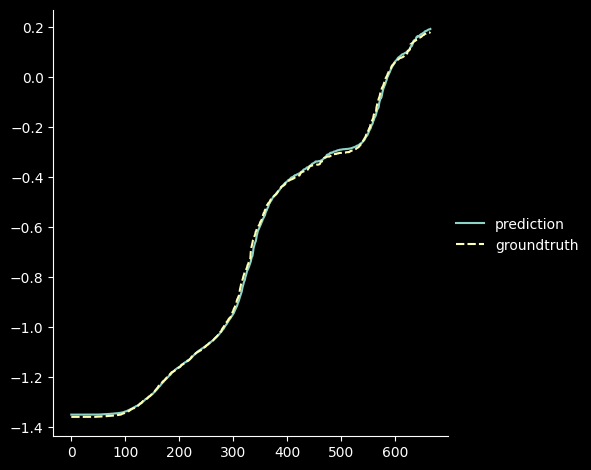

In [5]:
forecasts = task.plot_forecasts(task.train_dataset, index_range=[0, -1])

In [5]:
import torch
from epilearn.tasks.detection import Detection
from epilearn.models.Spatial.GCN import GCN

graph = torch.round(torch.rand((47, 47))) # nodes, nodes
features = torch.round(torch.rand((10,47,1,4))) # batch, nodes, time steps=1, channels
node_target = torch.round(torch.rand((10,47))) # batch, nodes

dataset = UniversalDataset(x=features,y=node_target,graph=graph)

lookback = 1 # inputs size
horizon = 2 # predicts size; also seen as number of classes

dataset.transforms = None
task = Detection(prototype=GCN, dataset=dataset, lookback=lookback, horizon=horizon, device='cpu')

# model_args={"num_features": 4, "hidden_dim": 16, "num_classes": 2, "nlayers": 2, "dropout": 0.5,
#             "with_bn": False, "with_bias": True, "device": 'cpu'}

result = task.train_model(dataset=dataset, 
                          loss='ce', 
                          epochs=25,
                          train_rate=0.6,
                          val_rate=0.1,
                          permute_dataset=False,
                        #   model_args=model_args
                          )

train_evaluation = task.evaluate_model(model=task.model,
                                features=task.train_split['features'],
                                graph=task.adj, 
                                dynamic_graph= task.train_split['dynamic_graph'], 
                                states=task.train_split['states'], 
                                targets=task.train_split['targets'])

spatial model loaded!


100%|██████████| 25/25 [00:00<00:00, 219.75it/s]



Final Training loss: 0.6882733106613159
Final Validation loss: 0.7059842944145203

Predicting Progress...


100%|██████████| 3/3 [00:00<00:00, 662.40it/s]


Test ACC: 0.5177304744720459

Predicting Progress...


100%|██████████| 6/6 [00:00<00:00, 569.43it/s]

ACC: 0.5390070676803589
